Uncover the factors that lead to employee attrition and explore important questions such as:
1. Show me a breakdown of distance from home by job role and attrition.
2. Compare average monthly income by education and attrition.

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [16]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [17]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [18]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [19]:
df['Education'].nunique()

5

In [20]:
df.MonthlyIncome.nunique()

1349

1. Show me a breakdown of distance from home by job role and attrition.

In [21]:
df.groupby(['DistanceFromHome', 'JobRole', 'Attrition'])['Attrition'].count().unstack().head(30)

Attrition                                     No   Yes
DistanceFromHome JobRole                              
1                Healthcare Representative  23.0   NaN
                 Human Resources             8.0   1.0
                 Laboratory Technician      27.0   4.0
                 Manager                    13.0   NaN
                 Manufacturing Director     23.0   1.0
                 Research Director          13.0   NaN
                 Research Scientist         40.0   7.0
                 Sales Executive            33.0   6.0
                 Sales Representative        2.0   7.0
2                Healthcare Representative  14.0   1.0
                 Human Resources             9.0   1.0
                 Laboratory Technician      25.0  11.0
                 Manager                    22.0   3.0
                 Manufacturing Director     22.0   2.0
                 Research Director          10.0   1.0
                 Research Scientist         32.0   4.0
                 Sales Executive            37.0   2.0
                 Sales Representative       12.0   3.0
3                Healthcare Representative   4.0   NaN
                 Human Resources             3.0   NaN
                 Laboratory Technician      12.0   3.0
                 Manager                     6.0   NaN
                 Manufacturing Director      4.0   1.0
                 Research Director           6.0   NaN
                 Research Scientist         15.0   5.0
                 Sales Executive            19.0   3.0
                 Sales Representative        1.0   2.0
4                Healthcare Representative   3.0   NaN
                 Human Resources             2.0   NaN
                 Laboratory Technician       9.0   3.0

Alternatively, using the dummy endoding technique within the pandas library:

In [22]:
df1 = pd.get_dummies(df[['DistanceFromHome', 'JobRole', 'Attrition']], columns = ['Attrition'])
df1

,DistanceFromHome,JobRole,Attrition_No,Attrition_Yes
0,1,Sales Executive,0,1
1,8,Research Scientist,1,0
2,2,Laboratory Technician,0,1
3,3,Research Scientist,1,0
4,2,Laboratory Technician,1,0
...,...,...,...,...
1465,23,Laboratory Technician,1,0
1466,6,Healthcare Representative,1,0
1467,4,Manufacturing Director,1,0
1468,2,Sales Executive,1,0


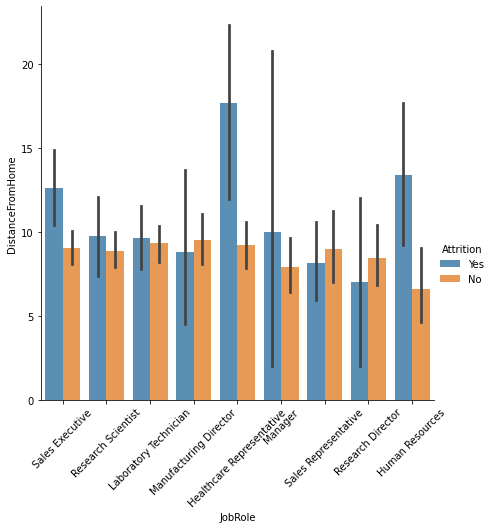

In [65]:
z=sns.catplot(x="JobRole", y="DistanceFromHome", hue="Attrition", data=df, kind="bar", alpha=.8, height=6,)
z.set_xticklabels(rotation=45)


In [10]:
df1.groupby(['DistanceFromHome', 'JobRole']).count().head(30)

Attrition_No  Attrition_Yes
DistanceFromHome JobRole                                               
1                Healthcare Representative            23             23
                 Human Resources                       9              9
                 Laboratory Technician                31             31
                 Manager                              13             13
                 Manufacturing Director               24             24
                 Research Director                    13             13
                 Research Scientist                   47             47
                 Sales Executive                      39             39
                 Sales Representative                  9              9
2                Healthcare Representative            15             15
                 Human Resources                      10             10
                 Laboratory Technician                36             36
                 Manager                              25             25
                 Manufacturing Director               24             24
                 Research Director                    11             11
                 Research Scientist                   36             36
                 Sales Executive                      39             39
                 Sales Representative                 15             15
3                Healthcare Representative             4              4
                 Human Resources                       3              3
                 Laboratory Technician                15             15
                 Manager                               6              6
                 Manufacturing Director                5              5
                 Research Director                     6              6
                 Research Scientist                   20             20
                 Sales Executive                      22             22
                 Sales Representative                  3              3
4                Healthcare Representative             3              3
                 Human Resources                       2              2
                 Laboratory Technician                12             12

2. Compare average monthly income by education and attrition.

In [66]:
df.groupby(['Education', 'Attrition'])['MonthlyIncome'].mean().unstack()


Attrition,No,Yes
Education,,
1,5926.129496,4360.161290
2,6586.058824,4282.545455
3,6882.919662,4770.242424
4,7087.814706,5335.155172
5,8559.906977,5850.200000


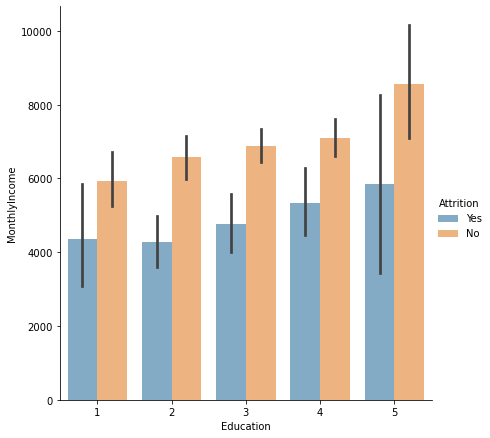

In [61]:
y=sns.catplot(x="Education", y="MonthlyIncome", hue="Attrition", data=df, kind="bar", alpha=.6, height=6,)
y.set_xticklabels(rotation=360)